# Create Arms

In [99]:
from re import X
import matplotlib.pyplot as plt
import math

class arm:
  def __init__(self, x, y, q, l):
    self.x= x
    self.y= y
    self.q= math.radians(q)
    self.l= l

  def end(self):
    self.end_x = self.x + self.l * math.cos(self.q)
    self.end_y = self.y + self.l * math.sin(self.q)
    return self.end_x, self.end_y

class arm1(arm):
  def velocity(self, degree, coff, t):
    self.degree= degree
    self.coff= coff
    if self.degree==1:
      self.v_x= -self.l * math.sin(self.q) * (self.coff[0])
      self.v_y= self.l * math.cos(self.q) * (self.coff[0])
      return self.v_x, self.v_y
    elif self.degree==4:
      self.v_x= (-self.l * math.sin(self.q)) * ((self.coff[0])*(4*(t**3)) + (self.coff[1])*(3*(t**2)) + (self.coff[2])*(2*t) + (self.coff[3]))
      self.v_y= (self.l * math.cos(self.q)) * ((self.coff[0])*(4*(t**3)) + (self.coff[1])*(3*(t**2)) + (self.coff[2])*(2*t) + (self.coff[3]))
      return self.v_x, self.v_y
    else:
      return 0.0, 0.0

class arm2(arm):
  def velocity(self, degree, coff1, coff2, t, vx, vy):
    self.degree= degree
    self.coff1= coff1
    self.coff2= coff2
    if self.degree==1:
      self.v_x= vx - (self.l * math.sin(self.q)) * (self.coff1[0] + self.coff2[0])
      self.v_y= vy + (self.l * math.cos(self.q)) * (self.coff1[0] + self.coff2[0])
      return self.v_x, self.v_y
    elif self.degree==4:
      self.v_x= vx - (self.l * math.sin(self.q)) * ((self.coff1[0])*(4*(t**3)) + (self.coff1[1])*(3*(t**2)) + (self.coff1[2])*(2*t) + (self.coff1[3]) + (self.coff2[0])*(4*(t**3)) + (self.coff2[1])*(3*(t**2)) + (self.coff2[2])*(2*t) + (self.coff2[3]))
      self.v_y= vy + (self.l * math.cos(self.q)) * ((self.coff1[0])*(4*(t**3)) + (self.coff1[1])*(3*(t**2)) + (self.coff1[2])*(2*t) + (self.coff1[3]) + (self.coff2[0])*(4*(t**3)) + (self.coff2[1])*(3*(t**2)) + (self.coff2[2])*(2*t) + (self.coff2[3]))
      return self.v_x, self.v_y
    else:
      return 0.0, 0.0




def plot(x1, y1, q1, q2):
    Arm1 = arm(x1, y1, q1, 1)
    x_e1, y_e1 = Arm1.end()

    Arm2 = arm(x_e1, y_e1, q1 + q2, 1)
    x_e2, y_e2 = Arm2.end()

    plt.plot([x1, x_e1], [y1, y_e1], linewidth=2)
    plt.plot([x_e1, x_e2], [y_e1, y_e2], linewidth=2)
    plt.scatter([x1, x_e1, x_e2], [y1, y_e1, y_e2])

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("2-Link Robotic Arm")

    plt.axis("equal")
    plt.xlim(-2.2, 2.2)
    plt.ylim(-2.2, 2.2)

# Linear Joint-Space Trajectory

Let,

##q1i := initial joint angle 1

###q2i := initial joint angle 2

###q1f := final joint angle 1

###q2f := final joint angle 2

###qj(t) := joint angle j at time t

###wj := angular speed of the arm j

###T := total time period of the motion


---------------
###qj(t)= wj*t + cj (linear interpolation)

###wj= (qji - qjf)/T

###t = [0, T]

###For the problem:

###q1i = 15

###q2i = 20

###q1f = 60

###q2f = 40

###T = 180

In [59]:
from IPython.display import Video, display
import imageio
import os

T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

w1 = (q1f - q1i)/T
w2 = (q2f - q2i)/T

os.makedirs("frames", exist_ok=True)
output_video= "robot_arm_linear.mp4"

with imageio.get_writer(output_video, fps=20) as writer:
  for t in range(0, T, 1):
    plt.figure(figsize=(5.12, 5.12))
    plot(0, 0, w1*t + q1i, w2*t+ q2i)
    plt.savefig(f"frames/{t}.png", dpi=100)
    plt.close()
    image = imageio.imread(f"frames/{t}.png")
    writer.append_data(image)

print("Video saved as", output_video)

/tmp/ipython-input-1545457392.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"frames/{t}.png")


Video saved as robot_arm_linear.mp4


In [21]:
display(Video("robot_arm_linear.mp4", embed=True))

## Joint angle  vs Time

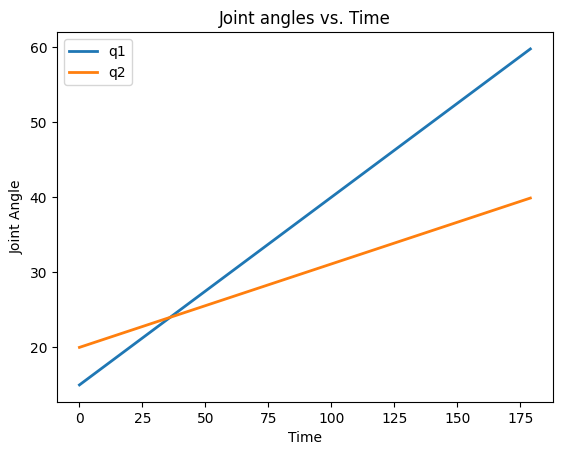

In [15]:
T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

w1 = (q1f - q1i)/T
w2 = (q2f - q2i)/T

plt.plot([t for t in range(0, T, 1)], [w1*t + q1i for t in range(0, T, 1)], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [w2*t + q2i for t in range(0, T, 1)], linewidth=2)
plt.ylabel("Joint Angle")
plt.xlabel("Time")
plt.title("Joint angles vs. Time")
plt.legend(["q1", "q2"])
plt.show()


## Joint trajectories

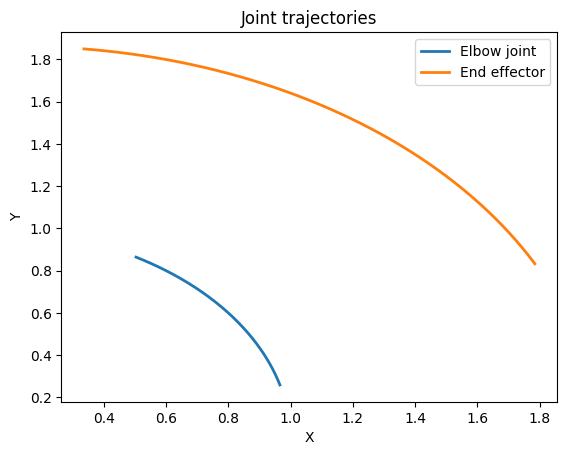

In [90]:
T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

w1 = (q1f - q1i)/T
w2 = (q2f - q2i)/T

elbow_joint= []
end_effector= []
for t in range(0, T, 1):
  arm1 = arm(0, 0, w1*t + q1i, 1)
  arm2 = arm(arm1.end()[0], arm1.end()[1], w1*t + q1i + w2*t + q2i, 1)
  end_effector.append(arm2.end())
  elbow_joint.append(arm1.end())


plt.plot([elbow_joint[i][0] for i in range(len(elbow_joint))], [elbow_joint[i][1] for i in range(len(elbow_joint))], linewidth=2)
plt.plot([end_effector[i][0] for i in range(len(end_effector))], [end_effector[i][1] for i in range(len(end_effector))], linewidth=2)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Joint trajectories")
plt.legend(["Elbow joint", "End effector"])
plt.show()


## Velocity

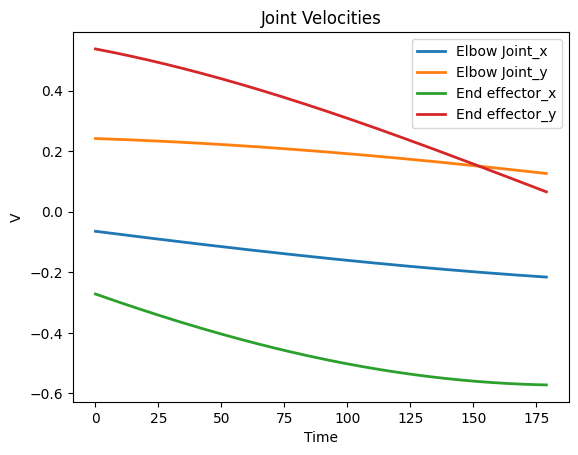

In [106]:
T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

w1 = (q1f - q1i)/T
w2 = (q2f - q2i)/T

elbow_joint_v= []
end_effector_v= []
for t in range(0, T, 1):
  Arm1 = arm1(0, 0, w1*t + q1i, 1)
  Arm2 = arm2(Arm1.end()[0], Arm1.end()[1], w1*t + q1i + w2*t + q2i, 1)
  vx, vy= Arm1.velocity(1, [w1], t)
  end_effector_v.append(Arm2.velocity(1, [w1], [w2], t, vx, vy))
  elbow_joint_v.append((vx, vy))


plt.plot([t for t in range(0, T, 1)], [elbow_joint_v[i][0] for i in range(len(elbow_joint_v))], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [elbow_joint_v[i][1] for i in range(len(elbow_joint_v))], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [end_effector_v[i][0] for i in range(len(end_effector_v))], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [end_effector_v[i][1] for i in range(len(end_effector_v))], linewidth=2)
plt.ylabel("V")
plt.xlabel("Time")
plt.title("Joint Velocities")
plt.legend(["Elbow Joint_x", "Elbow Joint_y", "End effector_x", "End effector_y"])
plt.show()

#Smooth Polynomial Trajectory

Let,

##q1i := initial joint angle 1

###q2i := initial joint angle 2

###q1f := final joint angle 1

###q2f := final joint angle 2

###qj := joint angle j

###wj := angular speed of the arm j

###T := total time period of the motion


---------------
###qj= aj(t^4) + bj(t^3) + cj(t^2) + dj(t) + ej (quintic interpolation)

###t = [0, T]

###For the problem:

###q1i = 15

###q2i = 20

###q1f = 60

###q2f = 40

###T = 180

### We solve the system of linear equataion usinf numpy library
### ej= qji (initial angle condition)
### aj(T^4) + bj(T3) + cj(T^2) + dj(T) + ej = qjf (final angle condition)
### dj = 0 (initial velocity 0 condition)
### 4aj(t^3) + 3bj(t^2) + 2cj(t) + dj = 0 (final velocity 0 condition)

In [82]:
import numpy as np

T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

# Coefficient matrix
A = np.array([
    [0,        0,    0,   1],
    [T**3,     T**2, T,   1],
    [0,        0,    1,   0],
    [3*(T**2), 2*T,  1,   0]
])

# Constants
B_1 = np.array([q1i, q1f, 0, 0])
B_2 = np.array([q2i, q2f, 0, 0])

# Solve AX = B
s1 = np.linalg.solve(A, B_1)
s2 = np.linalg.solve(A, B_2)

print("Solution:", s1)
print("Solution:", s2)

def q1(t):
  return s1[0]*(t**3) + s1[1]*(t**2) + s1[2]*(t) + s1[3]

def q2(t):
  return s2[0]*(t**3) + s2[1]*(t**2) + s2[2]*(t) + s2[3]

Solution: [-1.54320988e-05  4.16666667e-03  0.00000000e+00  1.50000000e+01]
Solution: [-6.85871056e-06  1.85185185e-03  0.00000000e+00  2.00000000e+01]


In [65]:
from IPython.display import Video, display
import imageio
import os

T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

os.makedirs("frames", exist_ok=True)
output_video= "robot_arm_cubic.mp4"

with imageio.get_writer(output_video, fps=20) as writer:
  for t in range(0, T, 1):
    plt.figure(figsize=(5.12, 5.12))
    plot(0, 0, q1(t), q2(t))
    plt.savefig(f"frames/{t}.png", dpi=100)
    plt.close()
    image = imageio.imread(f"frames/{t}.png")
    writer.append_data(image)

print("Video saved as", output_video)

/tmp/ipython-input-3821231866.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"frames/{t}.png")


Video saved as robot_arm_cubic.mp4


In [79]:
display(Video("robot_arm_cubic.mp4", embed=True))

## Joint angle vs Time

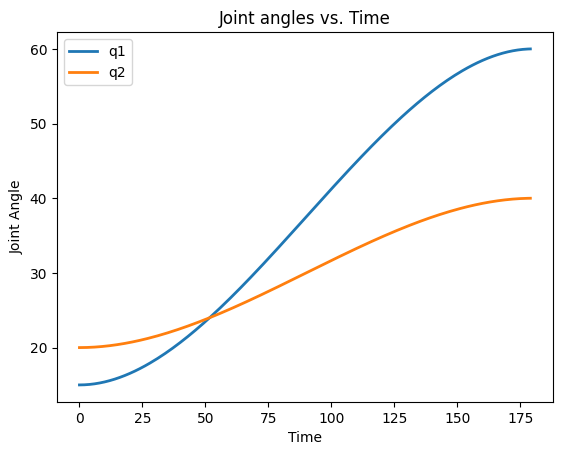

In [83]:
T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40


plt.plot([t for t in range(0, T, 1)], [q1(t) for t in range(0, T, 1)], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [q2(t) for t in range(0, T, 1)], linewidth=2)
plt.ylabel("Joint Angle")
plt.xlabel("Time")
plt.title("Joint angles vs. Time")
plt.legend(["q1", "q2"])
plt.show()


## Joint Trajectories

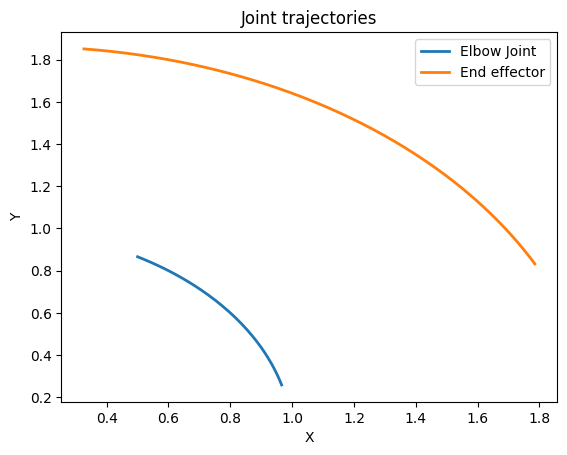

In [95]:
T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

elbow_joint= []
end_effector= []
for t in range(0, T, 1):
  arm1 = arm(0, 0, q1(t), 1)
  arm2 = arm(arm1.end()[0], arm1.end()[1], q1(t) + q2(t), 1)
  end_effector.append(arm2.end())
  elbow_joint.append(arm1.end())


plt.plot([elbow_joint[i][0] for i in range(len(elbow_joint))], [elbow_joint[i][1] for i in range(len(elbow_joint))], linewidth=2)
plt.plot([end_effector[i][0] for i in range(len(end_effector))], [end_effector[i][1] for i in range(len(end_effector))], linewidth=2)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Joint trajectories")
plt.legend(["Elbow Joint", "End effector"])
plt.show()


## Velocity

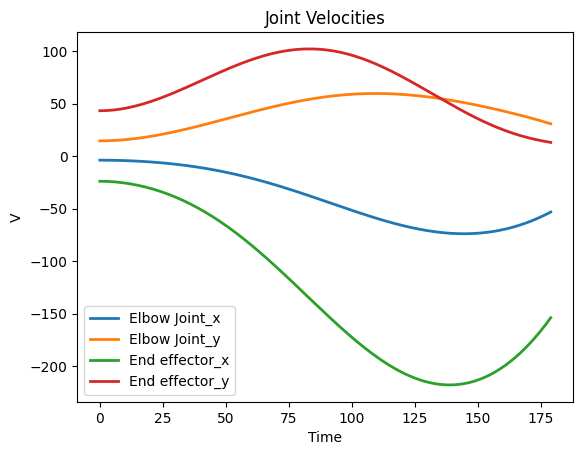

In [107]:
T = 180
q1i = 15
q2i = 20
q1f = 60
q2f = 40

elbow_joint= []
end_effector= []
for t in range(0, T, 1):
  Arm1 = arm1(0, 0, q1(t), 1)
  Arm2 = arm2(Arm1.end()[0], Arm1.end()[1], q1(t) + q2(t), 1)
  vx, vy = Arm1.velocity(4, list(s1), t)
  end_effector.append(Arm2.velocity(4, list(s1), list(s2), t, vx, vy))
  elbow_joint.append((vx, vy))



plt.plot([t for t in range(0, T, 1)], [elbow_joint[i][0] for i in range(len(elbow_joint))], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [elbow_joint[i][1] for i in range(len(elbow_joint))], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [end_effector[i][0] for i in range(len(end_effector))], linewidth=2)
plt.plot([t for t in range(0, T, 1)], [end_effector[i][1] for i in range(len(end_effector))], linewidth=2)
plt.ylabel("V")
plt.xlabel("Time")
plt.title("Joint Velocities")
plt.legend(["Elbow Joint_x", "Elbow Joint_y", "End effector_x", "End effector_y"])
plt.show()


Linear trajectory:

1. The slope (velocity) jumps suddenly at the start.

2. Another abrupt change happens at the end.

3. This makes the trajectory non-smooth, because velocity is not continuous.

4. If you plot velocity, you will see a discontinuity (a step change) at
t= 0 and t=T

Polynomial trajectory:

1. Velocity smoothly increases from 0 and smoothly returns to 0.

2. Acceleration changes gradually instead of suddenly.

3. The joint angle curve is smooth at both endpoints because the polynomial enforces continuity of position and velocity.

4. No sharp corners appear in the graph.

Smooth polynomial trajectories are more suitable for real robots because:

Robots cannot handle instantaneous velocity jumps, this causes motor strain, jerk, vibration, and lost precision.

Smooth trajectories ensure continuous velocity and often continuous acceleration.

This reduces stress on joints, improves control stability, and produces predictable motion.

Industrial robots almost always use cubic or quintic polynomials for these reasons.